In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
#This is the pattern_count function which returns the occurrences of a pattern in a DNA sequence
def pattern_count(text, pattern):
    c = 0
    for i in range(len(text)-len(pattern)):
        if text[i:i+len(pattern)] == pattern:
            c += 1
    return c

#Testing the pattern_count function
t = "ACAACTATGCATACTATCGGGAACTATCCT"
p = "ACTAT"
t1 = pattern_count(t,p)
t1

3

In [48]:
#Testing the pattern_coung function
t = "CGTGACAGTGTATGGGCATCTTT"
p = "TGT"
t1 = pattern_count(t,p)
t1

1

In [49]:
def frequent_word(text,k):#updated better bigO under
    
    """input: a string which represents DNA letters and number of bases in the pattern (k)
     output: the k-mer which has the most occurrences
    """
    count_ = []#to store the pattern with its occurrences in the text
    l = len(text)#the length of the text (DNA,RNA)
    result = []#to store the most frequent k-mer in text and be returned
    for i in range(l-k+1):
        temp = text[i:i+k]#a k-mer
        occurrence = [pattern_count(text,temp),temp]
        count_.append(occurrence)
    count_array = [count_[i][0] for i in range(len(count_))]#the COUNT(i) array
    max_count = max(count_array)
    for i in count_:
        if i[0] == max_count:
            result.append(i[1])
    result = set(result)
    return [result,max_count]

#testing the frequent_word function
t2 = frequent_word(t,3)
t2

[{'GTG'}, 2]

In [50]:
import itertools
def all_kmer(k):
    x = 'AGTC'
    l = itertools.product(x, repeat=k)
    l = list(l)
    result = []
    for i in l:
        temp = ''.join(i)
        result.append(temp)
    return result
def pattern_to_number(pattern):
    k = len(pattern)
    all_patterns = all_kmer(k=k)
    all_patterns.sort()#To sort all patterns
    index = all_patterns.index(pattern) 
    return index
def number_to_pattern(position,k):
    all_patterns = all_kmer(k=k)
    all_patterns.sort()
    pattern = all_patterns[position]
    return pattern

In [51]:
#Testing pattern_to_number
t6 = pattern_to_number("GT")
t7 = number_to_pattern(11,2)
t8 = number_to_pattern(9904,7)
print(t6)
print(t7)
print(t8)

11
GT
GCGGTAA


In [52]:
def frequent_word_update(text,k):#to improve better bigO
    
    """input: a string which represents DNA letters and number of bases in the pattern (k)
     output: the k-mer which has the most occurrences
    """
    frequency_array = list(np.zeros(4**k,dtype=int))
    #The frequency_array indeed is a list of index position of the patterns
    for i in range(len(text)-k+1):
        pattern = text[i:i+k]
        j = pattern_to_number(pattern)
        frequency_array[j] += 1
    return frequency_array

In [53]:
#Testing the frequent_word_update
dna = "AAGCAAAGGTGGG"
t7 = frequent_word_update(dna,2)
print(len(t7))
t7

16


[3, 0, 2, 0, 1, 0, 0, 0, 0, 1, 3, 1, 0, 0, 1, 0]

In [54]:
#Disadvantage: impractical when k is large
def faster_frequent_words(text,k):
    frequent_pattern = []
    frequen_array = frequent_word_update(text=text,k=k)
    max_ = max(frequen_array)
    for i in range(4**k):
        if frequen_array[i] == max_:
            pattern = number_to_pattern(i,k)
            frequent_pattern.append(pattern)
    return frequent_pattern

In [55]:
#testing the faster_frequent_words function
t6 = faster_frequent_words(t,3)
t6

['GTG']

In [56]:
%%latex
If this nucleotide is G, then $SKEW_{i+1}(Genome) = SKEW_i(Genome) + 1\\$
If this nucleotide is C, then $SKEW_{i+1}(Genome) = SKEW_i(Genome) - 1\\$
Otherwise: $SKEW_{i+1}(Genome) = SKEW_i(Genome)$

<IPython.core.display.Latex object>

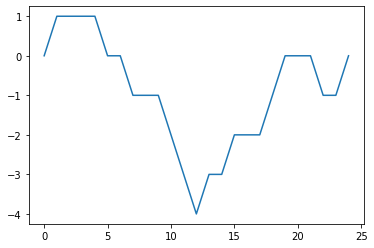

In [57]:
# The skew diagram
def skew_diagram(text):
    """input: bases"""
    text = text.lower()
    array = [0]
    for i in range(len(text)):
        if text[i] == 'c':
            temp = array[i] - 1

        elif text[i] == 'g':
            temp = array[i] + 1
        else:
            temp = array[i]
            
        array.append(temp)
    return array

#Testing the skew diagram
g1 = "GATACACTTCCCGAGTAGGTACTG"
t3 = skew_diagram(g1)
x = np.arange(len(t3))
plt.plot(x,t3)

### Minimum Skew Problem

In [58]:
%%latex
Minimum Skew Problem:
Find a position in a genome where the skew diagram attains a minimum.
$\\$Input: A DNA string Genome.
$\\$Output: All integer(s) i minimizing $SKEW_i(Genome)$ among all values of i
(from 0 to |Genome|).


<IPython.core.display.Latex object>

In [59]:
def find_ori(text):
    array = text.lower()
    skew = skew_diagram(array)#Now skew is a list
    min_ = min(skew)
    l = []
    for i in range(len(text)+1):
        if skew[i] == min_:
            l.append(i)
    if len(l) == 1:
        return l[0]
    else:
        return l

#Testing the find_ori
g1 = "GATACACTTCCCGAGTAGGTACTG"
t3 = find_ori(g1)
print(t3)

12


In [60]:
#For a dna segment which I found on the Internet
def remove_num(text):
    s = ''
    for i in text:
        if i.isalpha():
            s += i
    return s
df = pd.read_csv("dna.csv",header=None)
df1 = df[0].map(remove_num)
dna1 = ''
for i in range(len(df1)):
    dna1 += df1[i]
#check a short region of dna of an organism
t4 = find_ori(dna)
t4

[0, 1, 2, 4, 5, 6, 7]

In [61]:
%%latex
Position i in k-mers $p_1 · · · p_k$ and $q_1 · · · q_k$ is a mismatch if $p_i \ne q_i$.$\\$The
number of mismatches between strings p and q is called the Hamming distance between these strings and is denoted HAMMINGDISTANCE(p, q)

<IPython.core.display.Latex object>

### Hamming Distance Problem:
<br>Compute the Hamming distance between two strings.
<br>Input: Two strings of equal length.
<br>Output: The Hamming distance between these strings.

In [62]:
def complement(dna):
    dna = dna.lower()
    result = []
    for i in dna:
        if i == 'a':
            result.append('t')
        elif i == 't':
            result.append('a')
        elif i == 'g':
            result.append('c')
        else:
            result.append('g')
    return "".join(result)
def Hamming_Distance(p,b,reverse=True):
    """input: p, b are of type string
    output: integer"""
    p = p.lower()
    c = 0
    if reverse == False:#because sometimes we don't need to compare the
        #with the reverse compliment region
        q = complement(b[::-1])
        
    else:
        q = b.lower()
    for i in range(len(p)):
        if p[i] != q[i]:
            c += 1
    return c

#Test the Hamming distance
a_ = "CAGAAAGGAAGGTCCCCATACACCGACGCACCAGTTTA"
b_ = "CACGCCGTATGCATAAACGAGCCGCACGAACCAGAGAG"
t5 = Hamming_Distance(a_,b_)
t5

23

### Approximate Pattern Matching Problem:
Find all approximate occurrences of a pattern in a string.
Input: Strings Pattern and Text along with an integer d.
Output: All starting positions where Pattern appears as a substring of Text
with at most d mismatches

In [63]:
def approximate_pattern_count(Text, Pattern, d,reverse=True):
    lp = len(Pattern)
    lt = len(Text)
    c = 0 #to keep track of count
    for i in range(lt-lp):
        p = Text[i:i+lp]
        num = Hamming_Distance(p=p,b=Pattern,reverse=reverse)
        if num <= d:
            c += 1
    return c

#Testing
a = "CGTGACAGTGTATGGGCATCTTT"
pattern = "TGT"
approximate_pattern_count(a,pattern,1)

7

### Frequent Words with Mismatches Problem
Find the most frequent k-mers with mismatches in a string
<br> Input: a string text as well as integers k and d.
<br> Output: All most frequent k-mers with up to d mismatches in Text
<br> Idea: there are 4 types of bases, and each k-mers contains k letters, therefore, there are k^4 mers for each k-mers. First: we need to create a set of 4^k mers, second, we apply the approximate_pattern_count for each k-mer, finally, we choose the k-mer(s) which has the largest result.

In [64]:
#this strategy will be updated later


def Frequent_Words_with_Mismatches(text,k,d):
    #pattern_reverse
    list_max = []
    pattern = []
    all_pattern = all_kmer(k)
    pattern_with_mismatch = []
    for i in all_pattern:
        temp = approximate_pattern_count(text,i,d)
        list_max.append(temp)
        pattern_with_mismatch.append([temp,i])
    max_ = max(list_max)
    for i in pattern_with_mismatch:
        if i[0] == max_:
            pattern.append(i)
            
    #pattern not reverse
    
    pattern_with_mismatch_1 = []
    list_max_1 = []
    for i in all_pattern:
        temp = approximate_pattern_count(text,i,d,reverse=False)
        list_max_1.append(temp)
        pattern_with_mismatch_1.append([temp,i])
    max_1 = max(list_max_1)
    for i in pattern_with_mismatch_1:
        if i[0] == max_1:
            pattern.append(i)
            
    return pattern

### Frequent Words with Mismatches and Reverse Complements Problem
Find the most frequent k-mers (with mismatches and reverse complements) in a string.
<br>Input: A DNA string Text as well as integers k and d.
<br>Output: All k-mers Pattern that maximize the sum COUNTd(Text, Pattern) +
COUNTd(Text, Pattern) over all possible k-mers.

### CLUMPFINDING

In [65]:
def find_clumping(Genome,k,t,L):
    clump = list(np.zeros(4**k,dtype=int))
    frequent_pattern = set()
    text = Genome[0:L]
    frequency_array = frequent_word_update(text=text,k=k)
    #print(Genome)
    for i in range(4**k):
        if frequency_array[i] >= t:
            clump[i] = 1

    for i in range(1,len(Genome)-L+1):
        first_pattern = Genome[i-1:i-1+k]
        index = pattern_to_number(first_pattern)
        frequency_array[index] = frequency_array[index] - 1
        last_pattern = Genome[i+L-k:i+L-k+k]
        index = pattern_to_number(last_pattern)
        frequency_array[index] = frequency_array[index] + 1
        if frequency_array[index] >= t:
            clump[index] = 1
    for i in range(4**k):
        if clump[i] == 1:
            pattern = number_to_pattern(i,k)
            frequent_pattern.add(pattern)
    return frequent_pattern

### Testing find_clumping
Genome = 'CGGACTCGACAGATGTGAAGAACGACAATGTGAAGACTCGACACGACAGAGTGAAGAGAAGAGGAAACATTGTAA'
k= 5
L = 50
t = 4

t9 = find_clumping(Genome,k,t,L)
t9

{'CGACA', 'GAAGA'}

In [66]:
Frequent_Words_with_Mismatches(Genome,6,1)

[[5, 'AGAAGA'], [5, 'GAAGAA'], [5, 'TTCTTC'], [5, 'TCTTCT']]

### Finding neighbor
Given a k-mer
Pattern, we therefore define its d-neighborhood NEIGHBORS(Pattern, d) as the set of all
k-mers that are close to Pattern. 

In [67]:
def NEIGHBORS(Pattern, d):
    neighbour = set()
    k = len(Pattern)
    all_of_kmers = all_kmer(k)
    for i in all_of_kmers:
        if Hamming_Distance(i,Pattern) == d:
            neighbour.add(i)
    neighbour.add(Pattern)
    return neighbour
#Testing NEIGHBORS
#t10 = NEIGHBORS("TGCAT",2)
#len(set(t10))

### Compute Pr(N, A,Pattern, t)
The probability that a string Pattern appears t or more
times in a random string of length N formed from an alphabet of A letters.

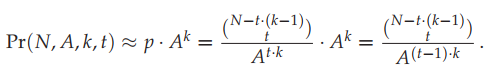

### Checking the origin of Salmonella enterica

In [68]:
from Bio.Blast import NCBIWWW
from Bio import SeqIO, SearchIO

In [69]:
mystery =  SeqIO.parse("mystery.fasta",format="fasta")
l = list(mystery)

In [70]:
l[0].description

'AE006468.2 Salmonella enterica subsp. enterica serovar Typhimurium str. LT2, complete genome'

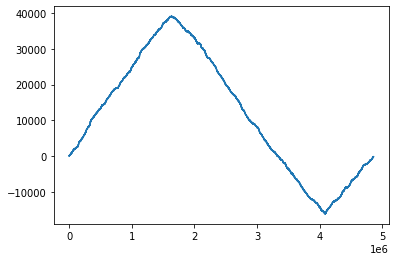

In [71]:
#Check the skew
dna = str(l[0].seq)

t11 = skew_diagram(dna)
x = np.arange(len(t11))
plt.plot(x,t11)

### Analysis
<br> According to the Skew diagram, we saw that the skew is decreasing along the
reverse half-strand and increasing along the forward half-strand. Thus, the skew should
achieve a minimum at the position where the reverse half-strand ends and the forward
half-strand begins.

In [72]:
# Find_ori
t12 = find_ori(dna)
print(t12)

[4084377, 4084379]


In [73]:
dna[4084377:4084379]

'GC'

In [74]:
#Create a window: estimation
origin_window = dna[4084377-100:4084379+100]
len(origin_window )

202

In [75]:
origin_window

'TTTTGCGCCAGCGCCTTTCAGTTCCGCTTCTATTTTCTCAATCGCGCCGCAAAACGTGTCGTATTCTCGACTGCCAATGCCAATTGCGCCGAAACGTACCGCGGAAAGATCGGGTTTCTGCGTCTGAAGGTCTTCATAGAAAGGGGTCAGGTTGTCCGGAATGTCTCCGGCACCGTGCGTTGAGCTGATTATCAGCCAGATC'

In [76]:
dnaA = Frequent_Words_with_Mismatches(origin_window,9,4)


# Potential dnaA

In [77]:
dnaA

[[25, 'CTTTTCTTC'], [25, 'GAAGAAAAG']]

# Chapter 2